In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

We are now going to learn functionalities that can help us re-create this little dashboard: 

<img src='dashboard_tmp.png' width="300" height="300">

What we need is: 
- aggregate data into 1D or 2D distributions 
- create subplots 
- adjust the axes limits 
- create a big title for the dashboard 
- set the colors 

### Read the data

Data about the internet transfer

In [2]:
data = pd.read_csv('ALB_2020-03.csv', index_col=[0])
data['DATE_TIME'] = pd.to_datetime(data['DATE_TIME'])

In [3]:
data.shape

(1048, 4)

In [4]:
data.head()

,CO,DOWNSTREAM,UPSTREAM,DATE_TIME
1149288,ALB,3.176651e+08,5.982221e+07,2020-03-18 00:00:00
1149289,ALB,2.880432e+08,6.382544e+07,2020-03-18 00:15:00
1149290,ALB,2.485370e+08,7.249465e+07,2020-03-18 00:30:00
1149291,ALB,2.247381e+08,6.292295e+07,2020-03-18 00:45:00
1149292,ALB,2.130292e+08,5.540958e+07,2020-03-18 01:00:00


Quick visualization: use pandas `df.plot` functionality, which also calls matplotlib

<Axes: xlabel='DATE_TIME'>

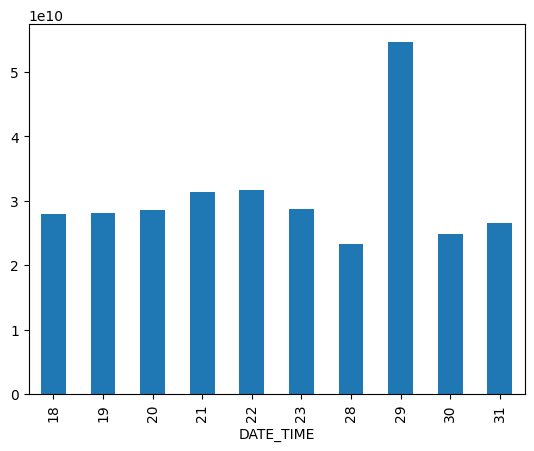

In [5]:
data.groupby(data['DATE_TIME'].dt.day)['DOWNSTREAM'].sum().plot.bar()

Look how big the numbers are -> order of 1e10. This may cause problems later on - generally better to rescale the data 

Pandas provides histograms out of the box: 

<Axes: >

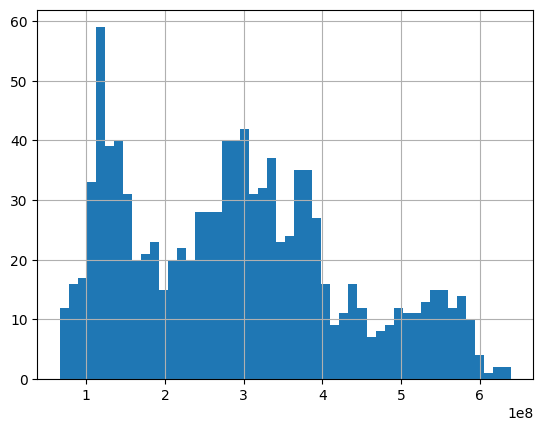

In [6]:
data['DOWNSTREAM'].hist(bins=50)

Different bin sizes reveal different structures - important analytical step to choose not too many, not too few

We don't need to import matplotlib to use pandas API, but if we want to use both of them, we need to import both

Pandas will create its own figure object, but we can use pandas with matplotlib objects created manually too: 

<Axes: >

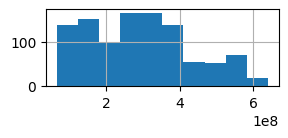

In [10]:
f, ax = plt.subplots(figsize=(3,1))

data['DOWNSTREAM'].hist(bins=10, ax=ax)

### Matplotlib: recreate the histogram using low-level functions 

While we could use ax.hist() function, for the sake of learning, let's separate the binning and drawing. This will be the case especially if you need to pre-process the data in a special way. 

First, we want to create bin edges and bin values manually - for this we need numpy. Then we will plot the binned data as a bar chart. 

In [11]:
nbins = 10
values, bin_edges = np.histogram(data['DOWNSTREAM'], bins=nbins)

In [12]:
print("num. values: {}".format(values.shape))
print("num. bin edges: {}".format(bin_edges.shape)) # we don't need the last bin edge here

num. values: (10,)
num. bin edges: (11,)


We have 1 extra bin edge (the last one) - need to remove it for plotting 

<BarContainer object of 10 artists>

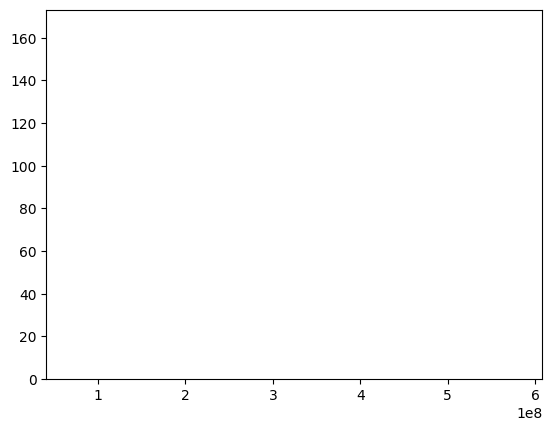

In [16]:
f, ax = plt.subplots()
ax.bar(x=bin_edges[:-1], height=values, ) 

# there is 10 artists, but there is nothing drawn! it's because bar width is in data coordinates (default width=0.8)

Let's define the width of the bar in relation to the data: 

<BarContainer object of 10 artists>

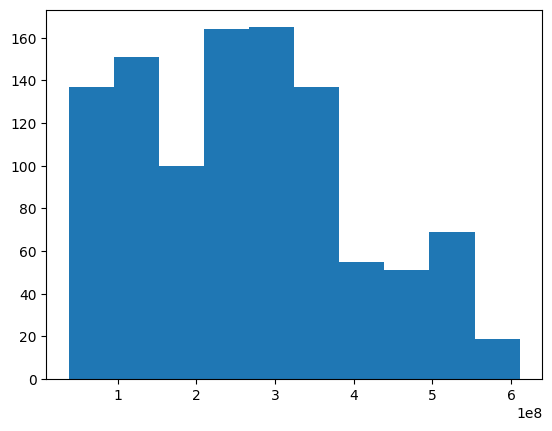

In [17]:
f, ax = plt.subplots()

# barwidth = 1e7 # absolute width 
barwidth = np.diff(bin_edges[:-1]).mean()  # width equal to the bin width 

ax.bar(x=bin_edges[:-1], height=values, width=barwidth)

We have another function to draw the horizontal bars: ax.barh(). The trick is that we have to swap the argument names!

<BarContainer object of 10 artists>

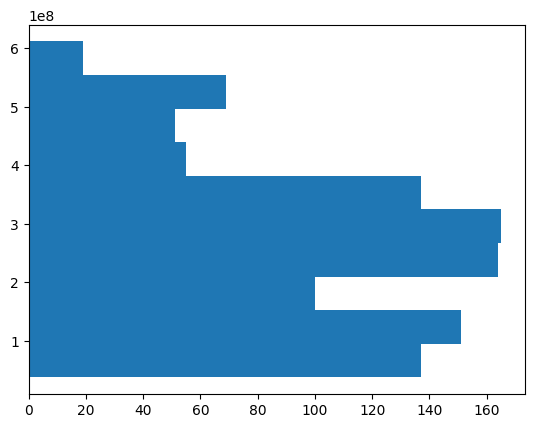

In [18]:
f, ax = plt.subplots()
barwidth = np.diff(bin_edges[:-1]).mean()  # width equal to the bin width 
ax.barh(y=bin_edges[:-1], height=barwidth, width=values) # for barh the height and width are swapped! 

If we want to draw a distribution, we can always overplot two plots on the same axes: 

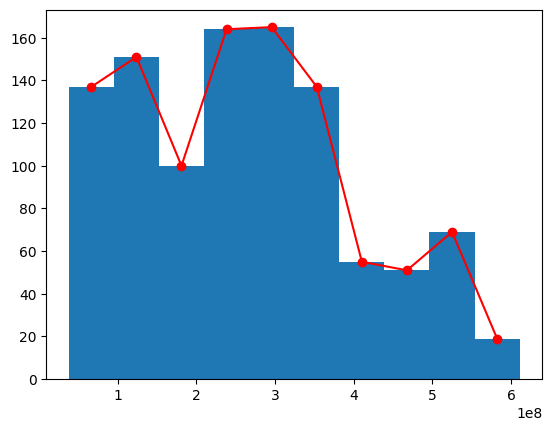

In [13]:
f, ax = plt.subplots()

barwidth = np.diff(bin_edges[:-1]).mean()  
ax.bar(x=bin_edges[:-1], height=values, width=barwidth)
ax.plot(bin_edges[:-1], values, color='r', marker='o') 


We only plotted the histogram values - we would need a separate function to estimate the continuous distribution based on it. 

### Seaborn histograms

How would the same task look like in seaborn? 

In [19]:
import seaborn as sns
print(sns.__version__)

0.13.0


In [20]:
data.head()

,CO,DOWNSTREAM,UPSTREAM,DATE_TIME
1149288,ALB,3.176651e+08,5.982221e+07,2020-03-18 00:00:00
1149289,ALB,2.880432e+08,6.382544e+07,2020-03-18 00:15:00
1149290,ALB,2.485370e+08,7.249465e+07,2020-03-18 00:30:00
1149291,ALB,2.247381e+08,6.292295e+07,2020-03-18 00:45:00
1149292,ALB,2.130292e+08,5.540958e+07,2020-03-18 01:00:00


<Axes: xlabel='DOWNSTREAM', ylabel='Count'>

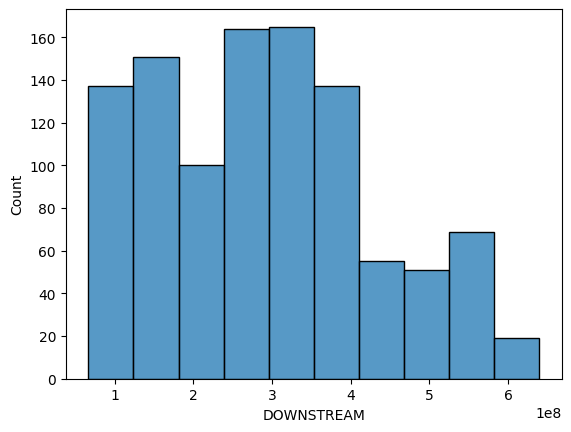

In [23]:
sns.histplot(data, x='DOWNSTREAM', bins=10)

Seaborn has more in-built statistics functionalities and it can fit the distribution for us: 

<Axes: xlabel='DOWNSTREAM', ylabel='Count'>

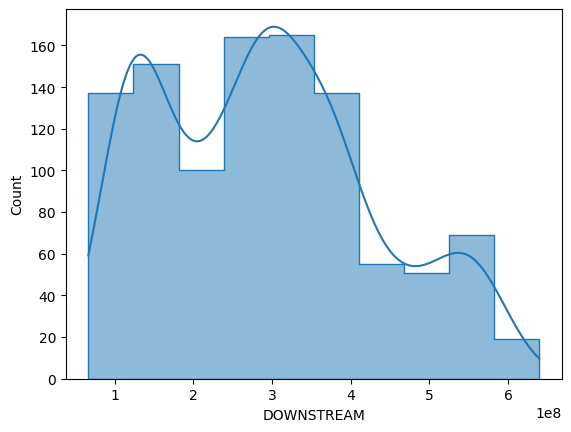

In [24]:
sns.histplot(data=data, x='DOWNSTREAM', bins=10, kde=True, element="step")
# sns.histplot(x=data['DOWNSTREAM'], bins=10, kde=True, element="step") # we can also pass a single series 

Also the API is a more consistent: 

<Axes: xlabel='Count', ylabel='DOWNSTREAM'>

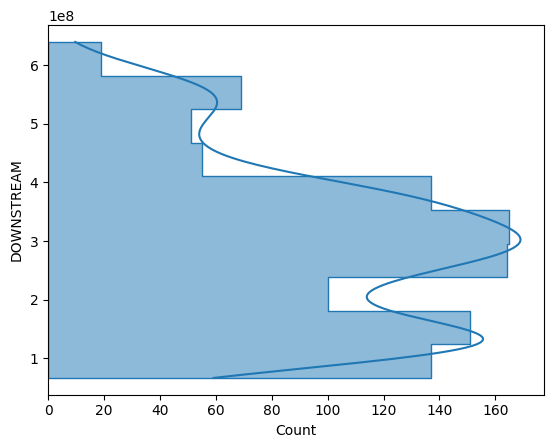

In [25]:
sns.histplot(data=data, y='DOWNSTREAM', bins=10, kde=True, element="step")

Seaborn creates its own figure and axes, which are matplotlib objects: 

Text(0.5, 1.0, 'my title')

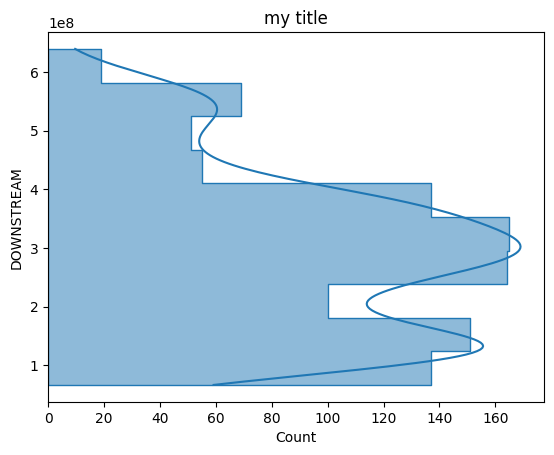

In [26]:
tmp = sns.histplot(data=data, y='DOWNSTREAM', bins=10, kde=True, element="step")
tmp.set_title('my title')

In [27]:
type(tmp)

matplotlib.axes._axes.Axes

But I can also plug it into a figure object I create with mpl: 

<Axes: xlabel='Count', ylabel='DOWNSTREAM'>

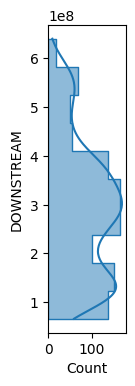

In [28]:
f, ax = plt.subplots(figsize=(1,4))

sns.histplot(data=data, y='DOWNSTREAM', bins=10, kde=True, element="step", 
            ax=ax)

___

### Styling bar charts 

We can set a style of a chart by using arguments to ax.bar() function. We can further customize the look by changing the attributes of axes: 

original y lims: (0.0, 173.25)


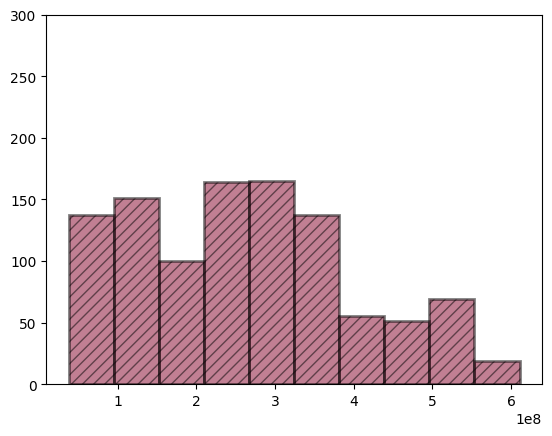

In [30]:
f, ax = plt.subplots()
barwidth = np.diff(bin_edges[:-1]).mean()*1.0  # width equal to the bin width 
ax.bar(x=bin_edges[:-1], height=values, width=barwidth, 
      linewidth=2, edgecolor='k', facecolor='#840128', alpha=0.5, hatch="///", )

print("original y lims: {}".format(ax.get_ylim()))
ax.set_ylim([0,300]);

The properties for ax.bar() can be stored in dicts - useful for modularizing! 

<BarContainer object of 10 artists>

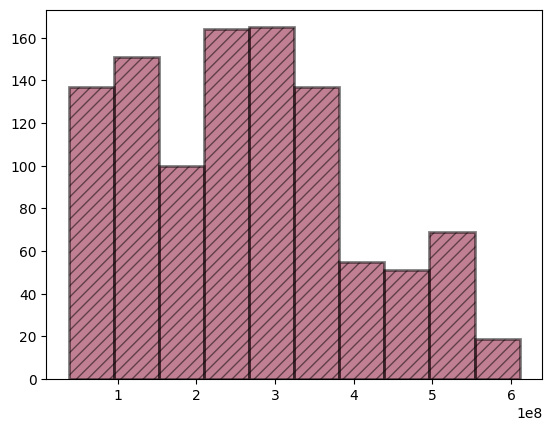

In [31]:
f, ax = plt.subplots()
barwidth = np.diff(bin_edges[:-1]).mean()*1.0  # width equal to the bin width 

bar_style = {'linewidth':2, 'edgecolor':'k', 'facecolor':'#840128', 'alpha':0.5, 'hatch':"///"} # saving bar style as a dict 

ax.bar(x=bin_edges[:-1], height=values, width=barwidth, **bar_style )


### Creating the 2D histograms in seaborn and matplotlib

#### Seaborn

You can use the same function, just provide both x and y arguments 

<Axes: xlabel='DOWNSTREAM', ylabel='UPSTREAM'>

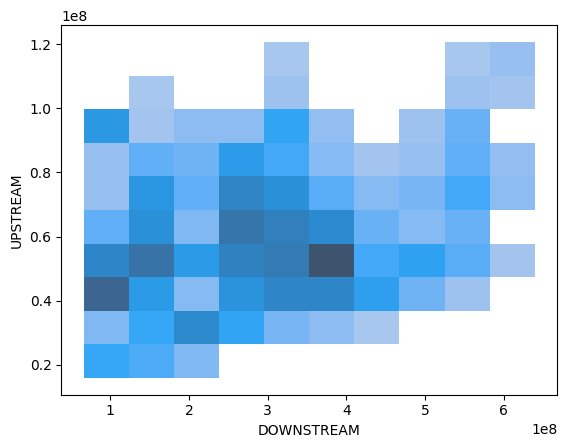

In [32]:
sns.histplot(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=10)

<Axes: xlabel='DOWNSTREAM', ylabel='UPSTREAM'>

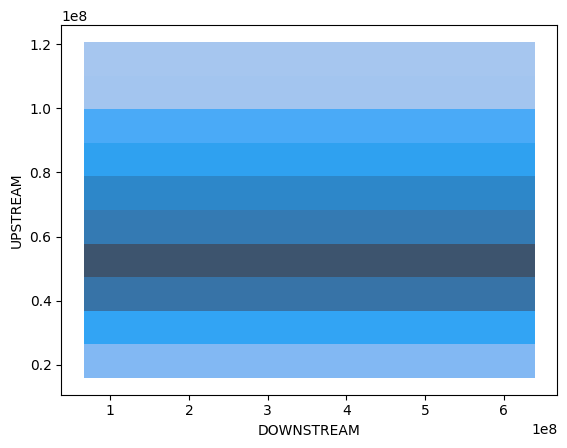

In [36]:
sns.histplot(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=(1,10))

We can change the colormap by calling a "cmap" argument. It comes in many other 2D matplotlib plots too. 

List of cmaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html 

We will have another class where we will look at manipulating colors in detail! 

<Axes: xlabel='DOWNSTREAM', ylabel='UPSTREAM'>

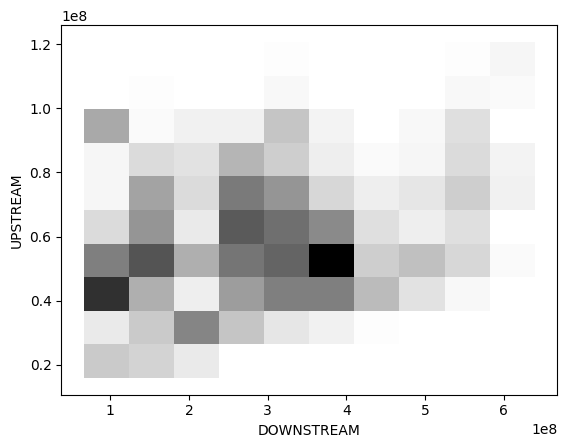

In [39]:
sns.histplot(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=10, 
            cmap='Greys')

#### Using matplotlib ax.hist2d()

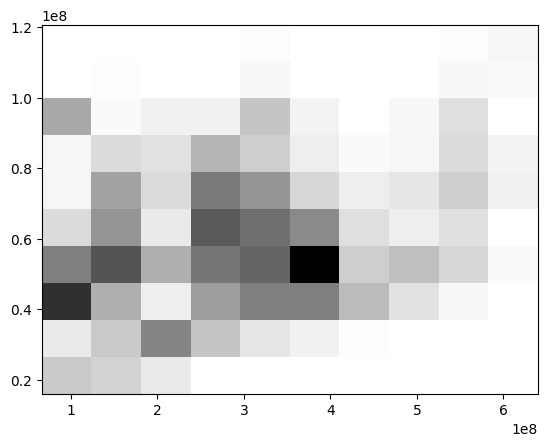

In [42]:
f, ax = plt.subplots()
ax.hist2d(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=nbins, 
          cmap='Greys'
         );

Use a semicolon to suppress the output

To see how to re-create ax.hist2d() using low-level ax.imshow(), scroll to the bottom! 

___

## Layouting with plt.subplots()

### Adding more axes to a figure

I can create more axes in the same figure and manipulate each of them separately: 

<Axes: xlabel='DOWNSTREAM', ylabel='Count'>

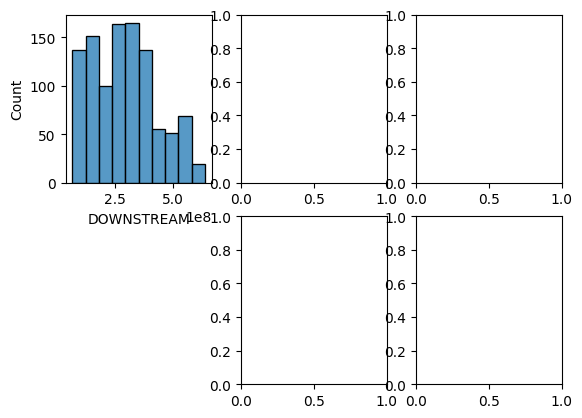

In [43]:
f, ax = plt.subplots(nrows=2, ncols=3)

ax[1][0].set_visible(False)

sns.histplot(data, x='DOWNSTREAM', bins=10, ax=ax[0][0])

If plt.subplots creates more than 1 axes object, it will return a list of objects. See also argument `squeeze` [docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)

In [44]:
ax

array([[<Axes: xlabel='DOWNSTREAM', ylabel='Count'>, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

In [45]:
ax[0][0]

<Axes: xlabel='DOWNSTREAM', ylabel='Count'>

### Customizing the subplots layout

We can change the ratio between the subplots and their distances by adjusting something called `GridSpec`: it is an engine that drives the subplot layouting in mpl

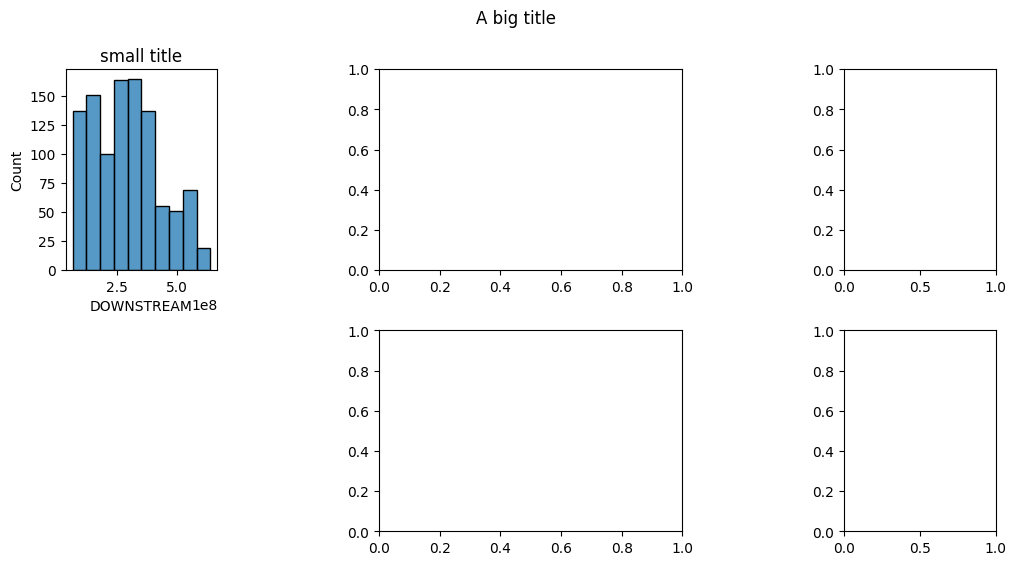

In [49]:
f, ax = plt.subplots(nrows=2, ncols=3, 
                     gridspec_kw={'hspace':0.3, 'wspace':0.8, 'width_ratios':[1,2,1]}, 
                     figsize=(12,6))
ax[1][0].set_visible(False)

sns.histplot(data, x='DOWNSTREAM', bins=10, ax=ax[0][0])
# ax[0][0].set_xlabel('')
ax[0][0].set_title('small title')

plt.suptitle('A big title');


___

# Task: create a dashboard

<img src='dashboard_tmp.png' width="500" >

Use the snippets above to re-create a dashboard: 

[Text(0, 0.5, '')]

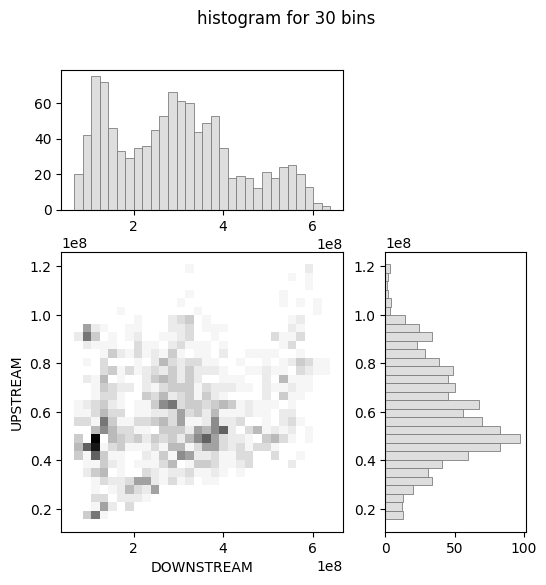

In [84]:
f, ax = plt.subplots(nrows=2, ncols=2, 
                     gridspec_kw={'width_ratios':[2,1], 'height_ratios':[1,2]}, 
                     figsize=(6,6))
ax[0][1].set_visible(False)
plt.suptitle('histogram for 30 bins');

histplot = sns.histplot(data=data, x='DOWNSTREAM', bins=30, element="bars", ax=ax[0,0], color="lightgray", edgecolor="gray")
histplot.set(xlabel=None)
histplot.set(ylabel=None)

sns.histplot(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=30, 
            cmap='Greys', ax=ax[1,0])

histploth = sns.histplot(data=data, y='UPSTREAM', bins=30, element="bars", ax=ax[1,1], color="lightgray", edgecolor="gray")
histploth.set(xlabel=None)
histploth.set(ylabel=None)

___

### Bonus: creating a heatmap in matplotlib from imshow

#### Using matplotlib imshow and numpy 

Let's try to reproduce it using `ax.imshow()`

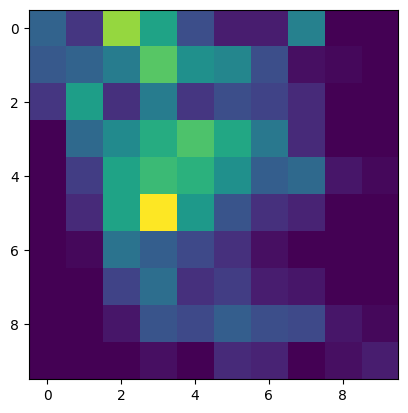

In [78]:
nbins = 10
H, xedges, yedges = np.histogram2d(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=nbins)

f, ax = plt.subplots()
ax.imshow(H)

The image is rotated and the axes are scaled with matrix index. Let's add `extent` and `origin` 

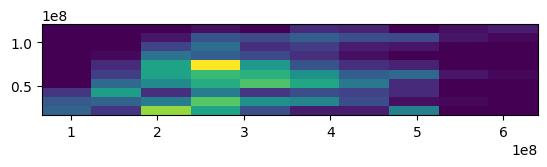

In [79]:
nbins = 10
H, xedges, yedges = np.histogram2d(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=nbins)

f, ax = plt.subplots()
ax.imshow(H, 
          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], #(left, right, bottom, top)
          origin='lower')

Imshow tries to keep the data "square", so that the pixels-per-data density is the same across both axes

However, looking at the previous plots, it's still rotated! why is that? let's investigate

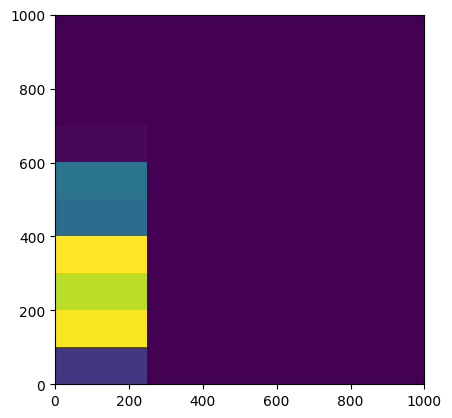

In [80]:
xbins = np.arange(0,1.1e3,1e2) # 10 bins on x 
ybins = np.arange(0,1.1e3,0.25e3) # 4 bins on y 
H, xedges, yedges = np.histogram2d(x=data['DOWNSTREAM']/1e6, y=data['UPSTREAM']/1e6, bins=(xbins, ybins))

f, ax = plt.subplots()
ax.imshow(H, 
          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], #(left, right, bottom, top)
          origin='lower')

In [81]:
H

array([[ 45.,   0.,   0.,   0.],
       [272.,   0.,   0.,   0.],
       [247.,   0.,   0.,   0.],
       [275.,   0.,   0.,   0.],
       [ 97.,   0.,   0.,   0.],
       [106.,   0.,   0.,   0.],
       [  6.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.]])

In [82]:
# The bi-dimensional histogram of samples x and y. 
#  Values in x are histogrammed along the first dimension and values in y are histogrammed along the second dimension.

H[0] # 4 bins on y, histogramming the x values 

array([45.,  0.,  0.,  0.])

So we need to have a `H.T` instead of `H` as our input matrix! 

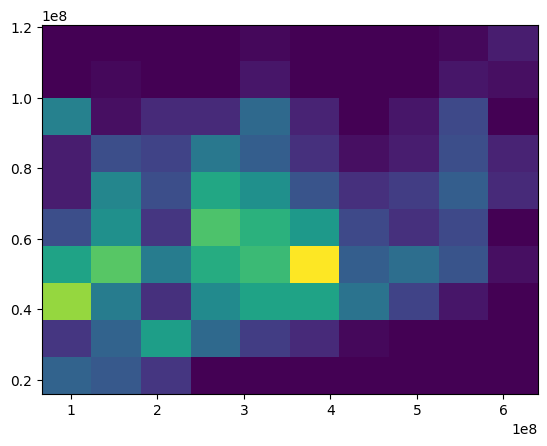

In [83]:
nbins = 10
H, xedges, yedges = np.histogram2d(x=data['DOWNSTREAM'], y=data['UPSTREAM'], bins=nbins)

f, ax = plt.subplots()
ax.imshow(H.T, aspect='auto', 
          extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], #(left, right, bottom, top)
          origin='lower')

___